# Neuromodulation dopamine and acetylcholine - acetylcholine  - adaptive - spiking presynaptic neuron

To simulate single neuromodulator in Snudda, firstly, the parameters from Neuromodcell have to been saved in modulations.json and placed in the model dircetory. 


To install snudda, follow the instructions at https://github.com/Hjorthmedh/Snudda/wiki/1.-User-installation

Following installation, the code below will set up the network and the neuromodulatory modulation.

To set the $DATA parameter for snudda, 

In [ ]:
import os

os.environ["SNUDDA_DATA"] = 'data'

This should be set to the directory where neurons, synapses and other parameters for the network have been placed. Look at the 'data' directory for referenece

Set the directory for where the neurons for the striatum (in this example) are saved

In [ ]:
neurons_dir = os.path.abspath('data/neurons/')

We wrote a specific neuromodulation init (based on snuddas init.py), to load the synapses which have had the modulation parameters included into the parameter sets as well as add SNc and dopaminergic neurons to the simulation

In [ ]:
from neuromodulationInitSNc import neuromodulationInit

network_path = 'dopamine-acetylcholine-adaptive-trial-network'
config_name= os.path.join(network_path,"network-config.json")
cnc = neuromodulationInit(config_file=config_name,random_seed=12345)

cnc.define_striatum_neuromodulation(num_dSPN=25,volume_type="cube",neurons_dir=neurons_dir)
cnc.define_snc(nNeurons=4,neuron_dir=neurons_dir)
dirName = os.path.dirname(config_name)

if not os.path.exists(dirName):
    os.makedirs(dirName)
    
cnc.write_json(config_name)

Then we place the neurons within the network (as we are running this locally we are limiting the network to 21 neurons). We then detect the potential synapses (by appositions between axons and dendrites) and then remove (prune) to reproduce the reported connectivity.  

In [ ]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.parse_config()
sp.write_data()

from snudda.detect import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

from snudda.plotting.plot_network import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot()
pn.close()

Following the assembly of the circuit, we set up the neuromodulatory connections which are needed for adaptive neuromodulation. The user defines the connections which are needed and the name of the connector, here we chose concACh and concDA. For the control, we set the weight as 0, otherwise 1e-2

In [ ]:
# Set up neuromodulation per synapse

from snudda.neuromodulation.modulation_synapse import  NeuromodulationSynapse

sw = NeuromodulationSynapse()
sw.set_weight(1e-2)


# Acetylcholine

sw.set_connection_type(connector = 'concACh', neuromodulation_key = 'ACh')

sw.add_cell_modulation(neuromodulation_key = 'ACh',\
                       cell='dSPN',\
                       ion_channels = {\
                        "soma": ['kir_ms','cal12_ms','cal13_ms','can_ms','Im_ms'],\
                        "dendrite": ['kir_ms','cal12_ms','cal13_ms'],
                        "axon": []}, 
                       receptors = ["tmGabaA", "tmGlut"],\
                       extrinsic = ["CorticalBase", "CorticalSignal", "Thalamic"],
                        type_connection='spiking-concentration')

# Dopamine

sw.set_connection_type(connector = 'concDA', neuromodulation_key = 'DA')

sw.add_cell_modulation(neuromodulation_key = 'DA',\
                       cell='dSPN',\
                       ion_channels = {\
                        "soma": ["cal12_ms","cal13_ms","kir_ms","kas_ms","naf_ms","can_ms"],\
                        "dendrite":["kir_ms","kas_ms","kaf_ms","cal12_ms","cal13_ms"],
                        "axon": []}, 
                       receptors = ["tmGabaA", "tmGlut"],\
                       extrinsic = ["CorticalBase", "CorticalSignal", "Thalamic"],
                        type_connection='spiking-concentration')

sw.save(dir_path='data/modulation',name='DA-ACh.json')


In [ ]:
# Set up neuromodulation per synapse

from snudda.neuromodulation.modulation_synapse import  NeuromodulationSynapse

sw = NeuromodulationSynapse()
sw.set_weight(0)


# Acetylcholine

sw.set_connection_type(connector = 'concACh', neuromodulation_key = 'ACh')

sw.add_cell_modulation(neuromodulation_key = 'ACh',\
                       cell='dSPN',\
                       ion_channels = {\
                        "soma": ['kir_ms','cal12_ms','cal13_ms','can_ms','Im_ms'],\
                        "dendrite": ['kir_ms','cal12_ms','cal13_ms'],
                        "axon": []}, 
                       receptors = ["tmGabaA", "tmGlut"],\
                       extrinsic = ["CorticalBase", "CorticalSignal", "Thalamic"],
                        type_connection='spiking-concentration')

# Dopamine

sw.set_connection_type(connector = 'concDA', neuromodulation_key = 'DA')

sw.add_cell_modulation(neuromodulation_key = 'DA',\
                       cell='dSPN',\
                       ion_channels = {\
                        "soma": ["cal12_ms","cal13_ms","kir_ms","kas_ms","naf_ms","can_ms"],\
                        "dendrite":["kir_ms","kas_ms","kaf_ms","cal12_ms","cal13_ms"],
                        "axon": []}, 
                       receptors = ["tmGabaA", "tmGlut"],\
                       extrinsic = ["CorticalBase", "CorticalSignal", "Thalamic"],
                        type_connection='spiking-concentration')

sw.save(dir_path='data/modulation',name='DA-ACh-control.json')

Compile the mechanisms used in the simulation

In [1]:
!nrnivmodl mechanisms-modulation-ptr/

Creating x86_64 directory for .o files.

/home/jofrony/Documents/Repositories/Neuromodulation-software/examples
ls: cannot access 'mechanisms-modulation-ptr//*.inc': No such file or directory
mechanisms-modulation-ptr//bk_ch.mod mechanisms-modulation-ptr//bk_fs.mod mechanisms-modulation-ptr//bk_ms.mod mechanisms-modulation-ptr//ca_ch.mod mechanisms-modulation-ptr//cadyn_fs.mod mechanisms-modulation-ptr//cadyn_ms.mod mechanisms-modulation-ptr//cal12_ms.mod mechanisms-modulation-ptr//cal12_ms_ptr.mod mechanisms-modulation-ptr//cal13_ms.mod mechanisms-modulation-ptr//cal13_ms_ptr.mod mechanisms-modulation-ptr//cal_ch.mod mechanisms-modulation-ptr//cal_ch_ptr.mod mechanisms-modulation-ptr//caldyn_ms.mod mechanisms-modulation-ptr//can_fs.mod mechanisms-modulation-ptr//can_ms.mod mechanisms-modulation-ptr//can_ms_ptr.mod mechanisms-modulation-ptr//cap_ch.mod mechanisms-modulation-ptr//cap_ch_ptr.mod mechanisms-modulation-ptr//caq_fs.mod mechanisms-modulation-ptr//caq_ms.mod mechanisms-modula

"/usr/local/nrn/x86_64/bin/nocmodl" cal12_ms_ptr
Translating cal12_ms_ptr.mod into cal12_ms_ptr.c
Notice: Use of POINTER is not thread safe.
Notice: Use of POINTER is not thread safe.
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o cal12_ms_ptr.lo cal12_ms_ptr.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c cal12_ms.c  -fPIC -DPIC -o .libs/cal12_ms.o
"/usr/local/nrn/x86_64/bin/nocmodl" cal13_ms
"/usr/local/nrn/x86_64/bin/nocmodl" cal13_ms_ptr
Translating cal13_ms.mod into cal13_ms.c
Translating cal13_ms_ptr.mod into cal13_ms_ptr.c
Notice: Use of POINTER is not thread safe.
Notice: Use of POINTER is not thread safe.
Thread Safe
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o ca

"/usr/local/nrn/x86_64/bin/nocmodl" cat32_ms
Translating cat32_ms.mod into cat32_ms.c
Thread Safe
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o cat32_ms.lo cat32_ms.c
"/usr/local/nrn/x86_64/bin/nocmodl" cat33_ms
Translating cat33_ms.mod into cat33_ms.c
Thread Safe
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o cat33_ms.lo cat33_ms.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c car_ms_ptr.c  -fPIC -DPIC -o .libs/car_ms_ptr.o
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c cat32_ms.c  -fPIC -DPIC -o .libs/cat32_ms.o
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/

libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c kaf_fs_ptr.c  -fPIC -DPIC -o .libs/kaf_fs_ptr.o
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c kaf_lts.c  -fPIC -DPIC -o .libs/kaf_lts.o
"/usr/local/nrn/x86_64/bin/nocmodl" kaf_lts_ptr
Translating kaf_lts_ptr.mod into kaf_lts_ptr.c
Notice: Use of POINTER is not thread safe.
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o kaf_lts_ptr.lo kaf_lts_ptr.c
"/usr/local/nrn/x86_64/bin/nocmodl" kaf_ms
Translating kaf_ms.mod into kaf_ms.c
Thread Safe
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o kaf_ms.lo kaf_ms.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/l

"/usr/local/nrn/x86_64/bin/nocmodl" kir23_lts_ptr
Translating kir23_lts_ptr.mod into kir23_lts_ptr.c
Notice: Use of POINTER is not thread safe.
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o kir23_lts_ptr.lo kir23_lts_ptr.c
"/usr/local/nrn/x86_64/bin/nocmodl" kir2_ch
Translating kir2_ch.mod into kir2_ch.c
Thread Safe
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o kir2_ch.lo kir2_ch.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c kir23_lts.c  -fPIC -DPIC -o .libs/kir23_lts.o
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c kir23_lts_ptr.c  -fPIC -DPIC -o .libs/kir23_lts_ptr.o
"/usr/local/nrn/x86_64/bin/nocmod

libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c na3n_lts_ptr.c  -fPIC -DPIC -o .libs/na3n_lts_ptr.o
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c na_ch.c  -fPIC -DPIC -o .libs/na_ch.o
"/usr/local/nrn/x86_64/bin/nocmodl" na_ch_ptr
Translating na_ch_ptr.mod into na_ch_ptr.c
Notice: Use of POINTER is not thread safe.
NEURON's CVode method ignores conservation
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o na_ch_ptr.lo na_ch_ptr.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c na_ch_ptr.c  -fPIC -DPIC -o .libs/na_ch_ptr.o
"/usr/local/nrn/x86_64/bin/nocmodl" naf_fs
"/usr/local/nrn/x86_64/bin/nocmodl" naf_fs_ptr
Translating naf_fs.mod into naf_fs.c
Translating naf_

libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c tmglut.c  -fPIC -DPIC -o .libs/tmglut.o
"/usr/local/nrn/x86_64/bin/nocmodl" tmglut_ptr
Translating tmglut_ptr.mod into tmglut_ptr.c
Thread Safe
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o tmglut_ptr.lo tmglut_ptr.c
"/usr/local/nrn/x86_64/bin/nocmodl" vecevent
Translating vecevent.mod into vecevent.c
Notice: ARTIFICIAL_CELL is a synonym for POINT_PROCESS which hints that it
only affects and is affected by discrete events. As such it is not
located in a section and is not associated with an integrator
Thread Safe
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o vecevent.lo vecevent.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I

Restart the kernel (if the assembly and generation of input and simulation are in different notebooks - THIS STEP IS NOT NEEDED)

In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()


In [ ]:
from snudda.input import SnuddaInput
import os

os.environ["SNUDDA_DATA"] = 'data'

network_path = 'dopamine-acetylcholine-adaptive-trial-network'

si = SnuddaInput(network_path=network_path, 
                 input_config_file=os.path.join("data","external_input","external-input-trial.json"),
                 verbose=False)
si.generate()

We then simulate the dopamine-acetylcholine and control case using Snudda

In [2]:
import os

os.environ["SNUDDA_DATA"] = 'data'

In [3]:
!mpiexec -n 4 snudda simulate dopamine-acetylcholine-adaptive-trial-network --time 3.0 --voltOut 'dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial.csv' --neuromodulation data/modulation/DA-ACh.json

numprocs=4
Using input file dopamine-acetylcholine-adaptive-trial-network/input-spikes.hdf5
args: Namespace(action='simulate', disable_gj=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation='data/modulation/DA-ACh.json', path='dopamine-acetylcholine-adaptive-trial-network', profile=False, randomseed=None, spikes_out=None, time=3.0, verbose=False, volt_out='dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial.csv')
Using input file dopamine-acetylcholine-adaptive-trial-network/input-spikes.hdf5
args: Namespace(action='simulate', disable_gj=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation='data/modulation/DA-ACh.json', path='dopamine-acetylcholine-adaptive-trial-network', profile=False, randomseed=None, spikes_out=None, time=3.0, verbose=False, volt_out='dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial.csv')
Using input file 

In [4]:
!mpiexec -n 4 snudda simulate dopamine-acetylcholine-adaptive-trial-network --time 3.0 --voltOut 'dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial-control.csv' --neuromodulation data/modulation/DA-ACh-control.json

numprocs=4
Using input file dopamine-acetylcholine-adaptive-trial-network/input-spikes.hdf5
args: Namespace(action='simulate', disable_gj=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation='data/modulation/DA-ACh-control.json', path='dopamine-acetylcholine-adaptive-trial-network', profile=False, randomseed=None, spikes_out=None, time=3.0, verbose=False, volt_out='dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial-control.csv')
Using input file dopamine-acetylcholine-adaptive-trial-network/input-spikes.hdf5
args: Namespace(action='simulate', disable_gj=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation='data/modulation/DA-ACh-control.json', path='dopamine-acetylcholine-adaptive-trial-network', profile=False, randomseed=None, spikes_out=None, time=3.0, verbose=False, volt_out='dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial

Following the simulation, we plot the simulations individually using code from snudda. First, the dopamine-acetylcholine modulated simulation

Unable to guess ID, using 666.
Loading 29 neurons with 21909 synapses and 0 gap junctions
!!! Excluding first 0s from the plot
Plotting traces: [1, 3, 6, 7, 8, 9, 10, 11, 12, 13]
Plotted 10 traces (total 29)
Saving to figure Network-spikes-666-dSPN-colour.pdf


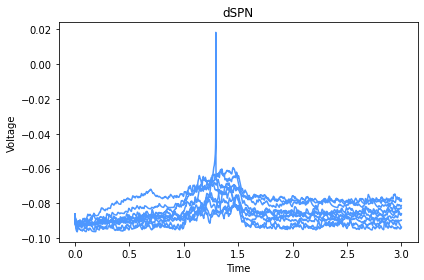

<Figure size 432x288 with 0 Axes>

No traces of iSPN to show
No traces of FSN to show


In [5]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  
skip_time = 0  
num_traces_max = 10

network_path = 'dopamine-acetylcholine-adaptive-trial-network'
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "network-voltage-DA-ACh-trial.csv")

pl = PlotTraces(file_name=volt_file_name,network_file=network_file)

pl.plotTraceNeuronType(neuron_type="dSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plotTraceNeuronType(neuron_type="iSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plotTraceNeuronType(neuron_type="FSN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)


Second, we plot the control simulation. 

Unable to guess ID, using 666.
Loading 29 neurons with 21909 synapses and 0 gap junctions
!!! Excluding first 0s from the plot
Plotting traces: [1, 3, 6, 7, 8, 9, 10, 11, 12, 13]
Plotted 10 traces (total 29)
Saving to figure Network-spikes-666-dSPN-colour.pdf


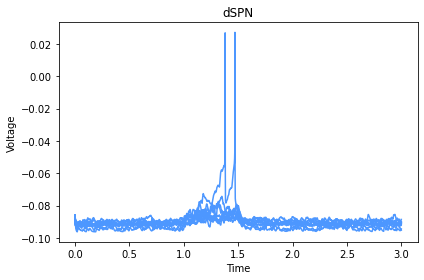

<Figure size 432x288 with 0 Axes>

No traces of iSPN to show
No traces of FSN to show


In [6]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  
skip_time = 0  
num_traces_max = 10

network_path = 'dopamine-acetylcholine-adaptive-trial-network'
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "network-voltage-DA-ACh-trial-control.csv")

pl = PlotTraces(file_name=volt_file_name,network_file=network_file)

pl.plotTraceNeuronType(neuron_type="dSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plotTraceNeuronType(neuron_type="iSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plotTraceNeuronType(neuron_type="FSN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)


We need load and plot control (black) and dopamine/acetylcholine modulated (red). We see clear effect on dSPN, which should depolarise upon dopamine modulation and the tonic depolarisation following muscarinic modulation, while iSPN do not have a clear effect from dopamine, but muscarinic modulation is tonic and depolarises the cell. FS have quite a large response to dopamine modulation, which is also seen in the network

In [7]:
from plot import plot_dopamine_acetylcholine_control
from compare import compareTraces

fn = ['dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial-control.csv',\
     'dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial.csv']

nf = ['dopamine-acetylcholine-adaptive-trial-network/network-synapses.hdf5',\
     'dopamine-acetylcholine-adaptive-trial-network/network-synapses.hdf5']


kl = compareTraces(fileNames=fn,\
                      networkFiles=nf,labels=['control', 'DA','DA-ACh'],colours=['black','purple'])


Unable to guess ID, using 666.
Loading 29 neurons with 21909 synapses and 0 gap junctions
Loading 29 neurons with 21909 synapses and 0 gap junctions


/home/jofrony/Documents/Repositories/Neuromodulation-software/examples/plot.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


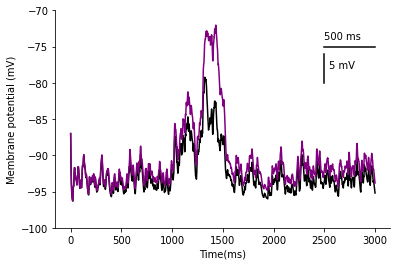

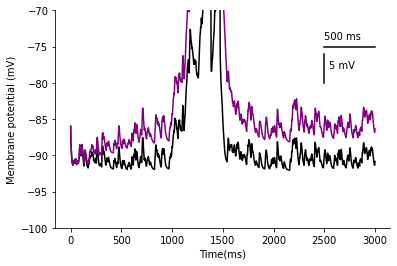

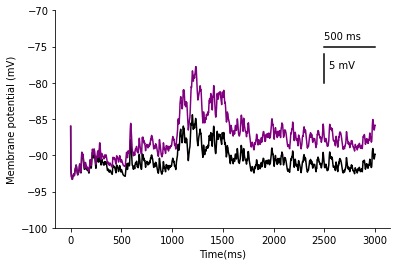

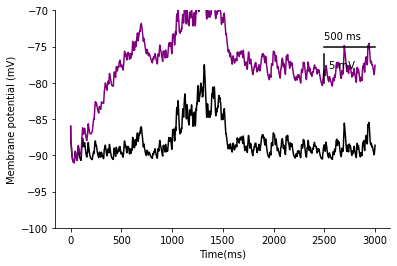

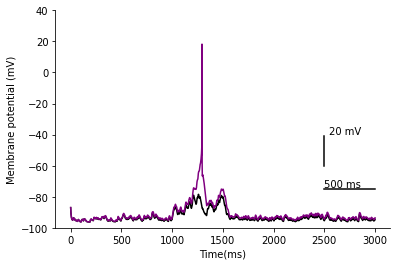

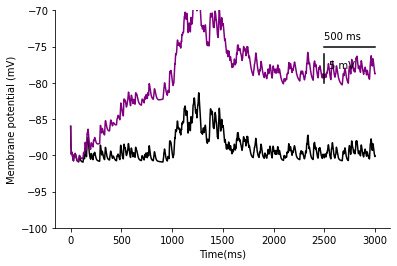

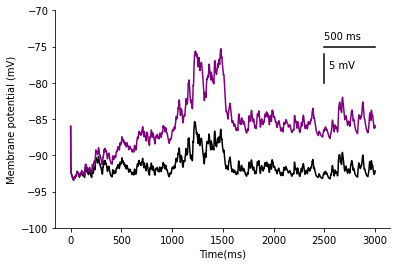

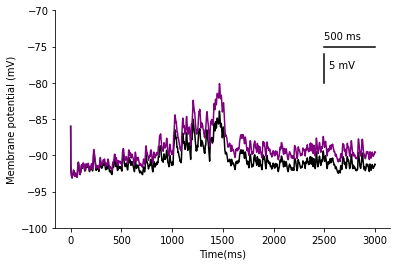

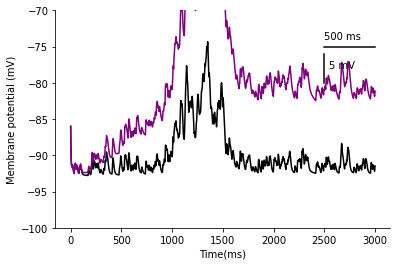

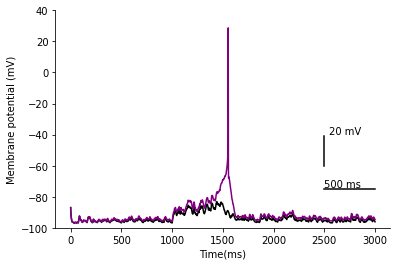

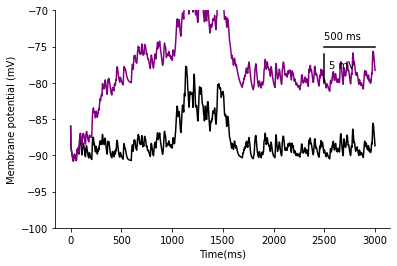

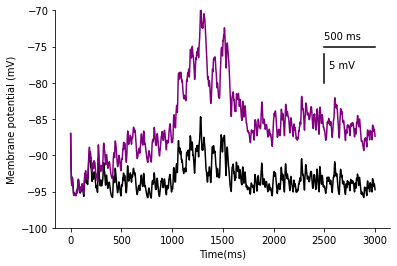

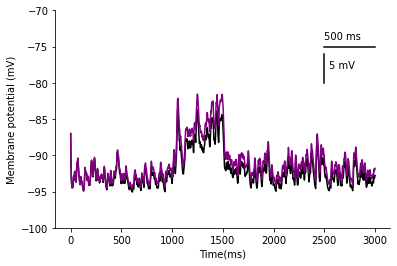

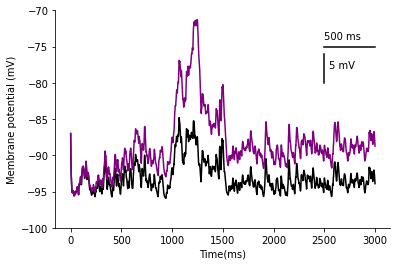

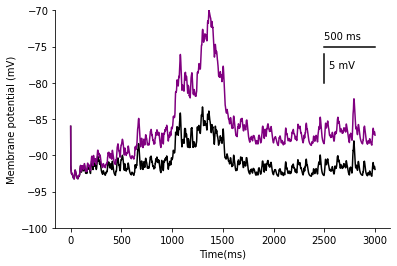

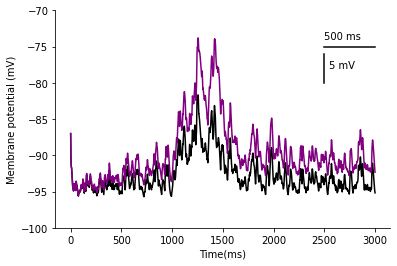

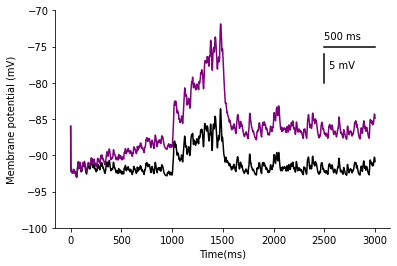

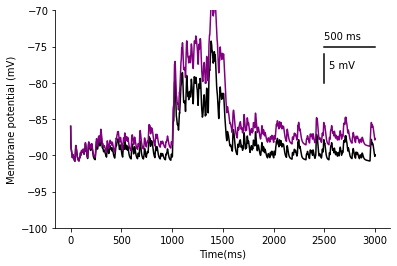

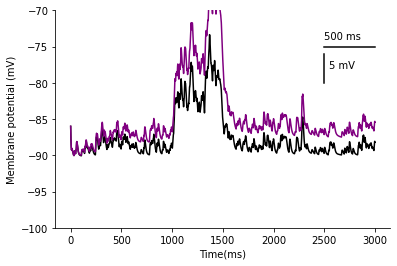

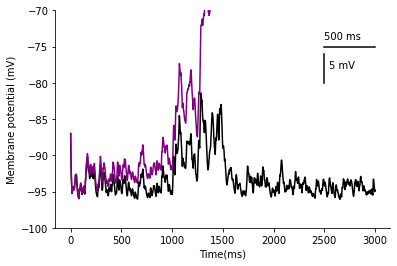

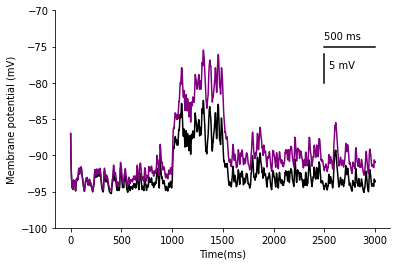

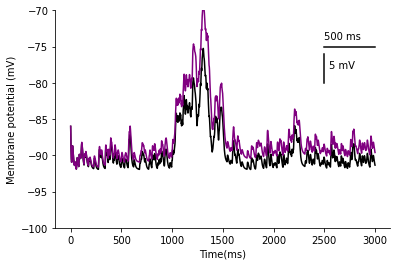

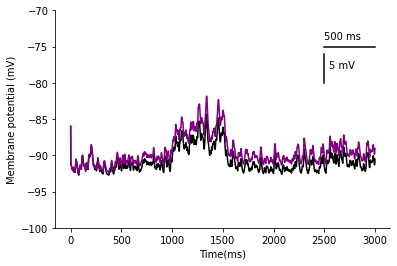

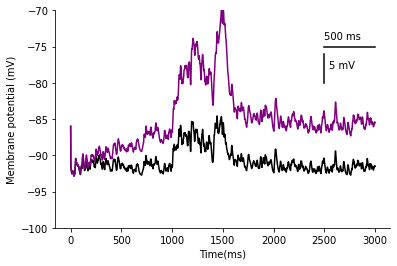

In [8]:
plot_dopamine_acetylcholine_control(kl,type_cell='dSPN')
